In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/human-iga-bariatric'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the dataset
## from:
Compensatory intestinal antibody response against pro-inflammatory microbiota after bariatric surgery.

Scheithauer, Torsten PM, Mark Davids, Maaike Winkelmeijer, Xanthe Verdoes, Ömrüm Aydin, Maurits de Brauw, Arnold van de Laar et al. 

Gut Microbes 14, no. 1 (2022): 2031696.

https://doi.org/10.1080/19490976.2022.2031696

In [7]:
dat=ca.read_amplicon('./all.biom','./map.joined.txt',normalize=10000,min_reads=1000)

2022-07-27 16:46:20 INFO loaded 125 samples, 1664 features
2022-07-27 16:46:20 WARNING Found 2 samples that have metadata but do not have data. These samples have been dropped.
2022-07-27 16:46:20 INFO First 5 samples without data: ['ERR7248042', 'ERR7247982']
2022-07-27 16:46:20 INFO After filtering, 125 samples remaining.


In [8]:
datc=dat.cluster_features(10)

2022-07-27 16:46:29 INFO After filtering, 1097 features remaining.


In [9]:
datc=datc.sort_samples('subj')
datc=datc.sort_samples('Phenotype')
datc=datc.sort_samples('frac')

In [10]:
datc=datc.add_terms_to_features('dbbact',['homo sapiens','soil','water','contaminant'])

2022-07-27 16:46:30 INFO Getting dbBact annotations for 1097 sequences, please wait...
2022-07-27 16:46:38 INFO got 4889 annotations
2022-07-27 16:46:38 INFO Got 91352 annotation-sequence pairs
2022-07-27 16:46:38 INFO Added annotation data to experiment. Total 4889 annotations, 1097 ASVs


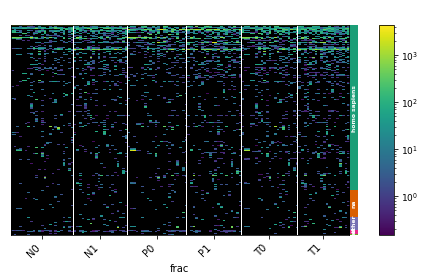

In [11]:
datc.sort_by_metadata('common_term',axis='f').plot(gui='cli',sample_field='frac',bary_fields=['common_term'])

## We see a set of ASVs which are present in the N/P fractions (but not the T) and are soil origin
(at the bottom left)

So they are probably contaminants from the FACS process.

We marks them and save their sequences in the interactive heatmap and then filter them away

In [12]:
datc=datc.filter_by_fasta('./contam.fa',negate=True)
datc=datc.normalize(10000)

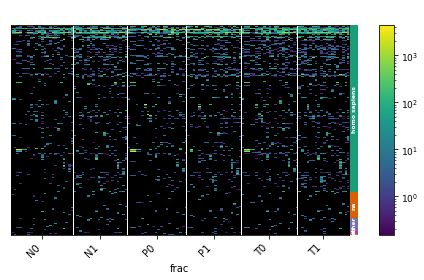

In [13]:
datc.sort_by_metadata('common_term',axis='f').plot(gui='cli',sample_field='frac',bary_fields=['common_term'])

# Identify ASVs higher in the negative/positive fractions
we do a paired test on the subject (permuting samples within each individual)

In [14]:
dd=datc.diff_abundance_paired('subj','frac2','IgA-negative','IgA-positive',alpha=0.5,random_seed=2022)

2022-07-27 16:47:31 INFO 45 samples left after removing group value singletons
2022-07-27 16:47:32 INFO 45 samples with both values
2022-07-27 16:47:32 INFO After filtering, 900 features remaining.
2022-07-27 16:47:32 INFO 23 samples with value 1 (IgA-negative), 22 samples with value2 (IgA-positive)
2022-07-27 16:47:33 INFO number of higher in IgA-negative: 70. number of higher in IgA-positive : 137. total 207


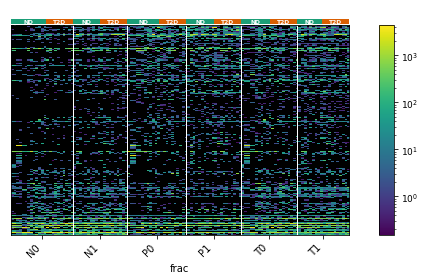

In [15]:
datc.filter_ids(dd.feature_metadata.index).plot(gui='cli',sample_field='frac',barx_fields=['Phenotype'])

2022-07-27 16:47:36 INFO Found 1 experiments ([869]) matching current experiment - ignoring them.
2022-07-27 16:47:40 INFO found 7 negative
2022-07-27 16:47:41 INFO found 7 positive


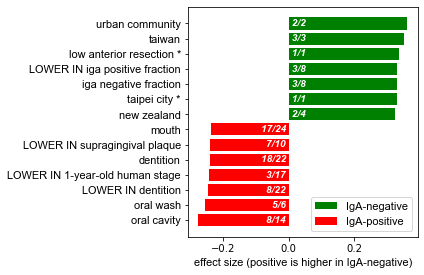

In [16]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()


In [17]:
f.figure.savefig('./fig-terms-neg-pos.pdf')

In [18]:
e.save('./table-terms-neg-pos')

2022-07-27 16:47:42 INFO Metadata field taxonomy not found. Saving biom table without metadata


2022-07-27 16:47:42 INFO found 94 annotations with the term ['oral cavity']
2022-07-27 16:47:43 INFO annotation 6489 is low
2022-07-27 16:47:43 INFO annotation 6491 is low
2022-07-27 16:47:43 INFO annotation 6497 is low
2022-07-27 16:47:43 INFO annotation 6503 is low
2022-07-27 16:47:43 INFO annotation 6504 is low
2022-07-27 16:47:44 INFO annotation 6501 is low
2022-07-27 16:47:44 INFO annotation 2704 is low
2022-07-27 16:47:45 INFO annotation 6493 is low
2022-07-27 16:47:45 INFO annotation 6495 is low
2022-07-27 16:47:45 INFO annotation 6574 is low
2022-07-27 16:47:45 INFO annotation 6499 is low
2022-07-27 16:47:46 INFO annotation 7416 is low
2022-07-27 16:47:46 INFO ignored 2 annotations
2022-07-27 16:47:46 WARNING Clipped term circle size to 500. Real size (number of term seqs not overlapping) should be: 3651


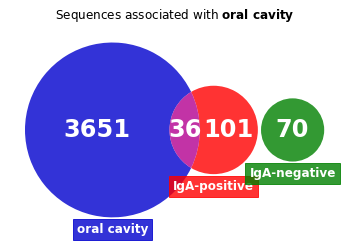

In [19]:
f=db.plot_term_venn_all('oral cavity',dd,max_size=500,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':24},max_id=7440)

In [20]:
f.savefig('./fig-venn-oral-cavity.pdf')